C:\Users\tiany\Anaconda3\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


name 0.021739130434782608


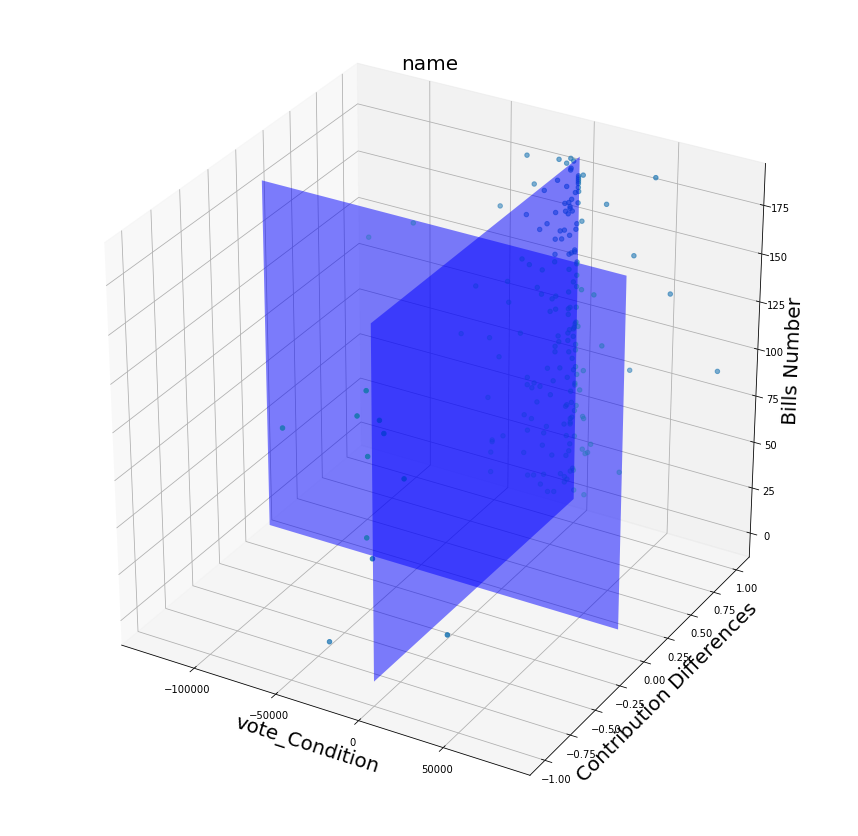

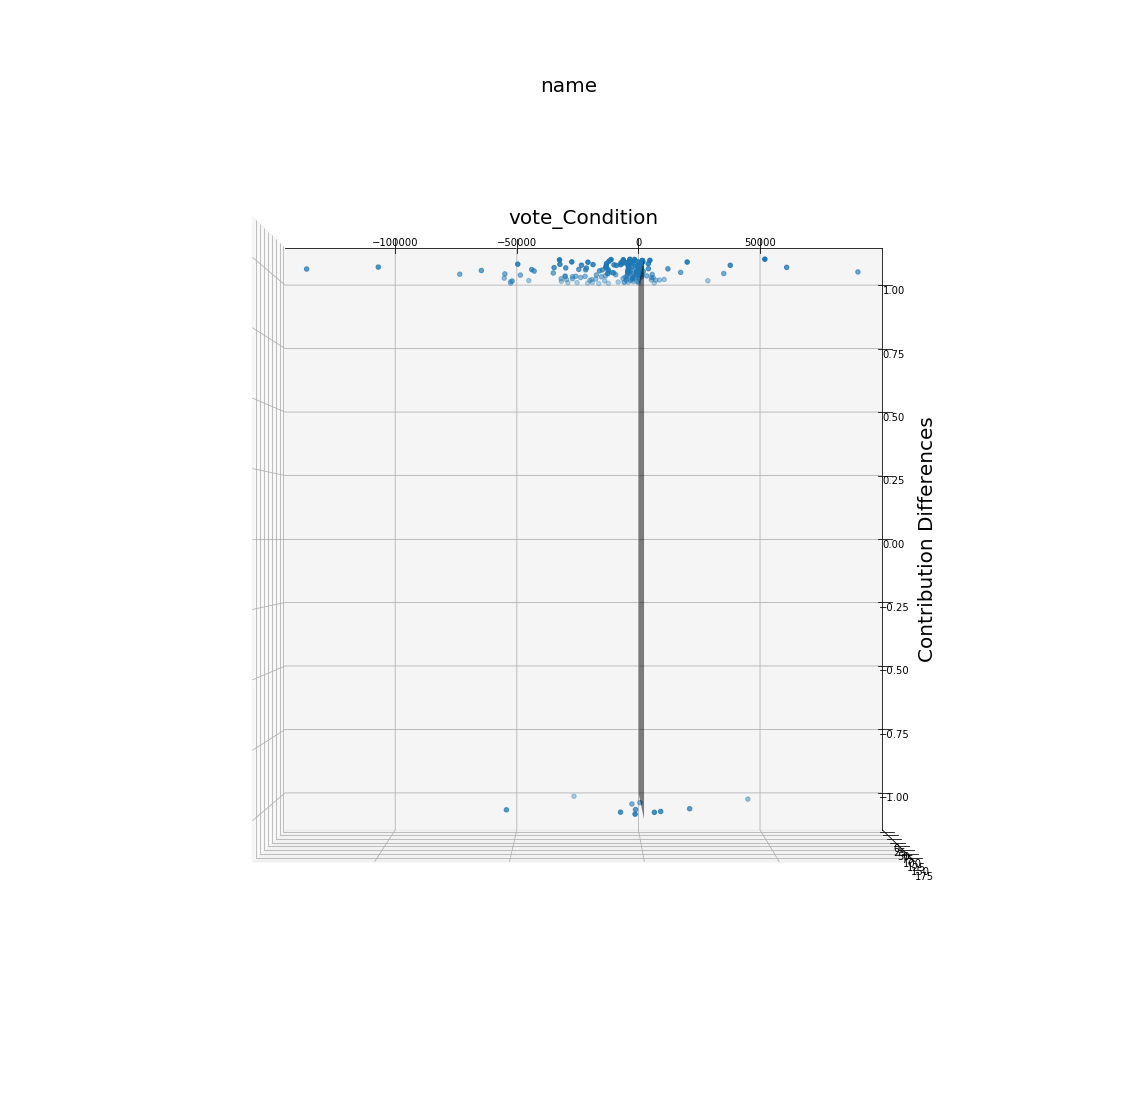

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import csv
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as mp3d

path = r'C:\Users\tiany\Documents\EE6895 big data\bill\110'
allFiles = glob.glob(path + "/*.csv")
#allFiles = glob.glob("bill/*.csv")
#create lists
#vote same or not between party and individuals
Vote_condition = []
#contribution differences
difference = []
#bill number
billname = []
corrupt_point = []
#try legislator 'Neil Abercrombie''Democrate'/ 'Stephanie Herseth Sandlin


for i in range(len(allFiles)):
    df = pd.read_csv(allFiles[i], encoding='latin-1',low_memory=False)
    #print(allFiles[i])
    df['Contribution Amount'] = df['Contribution Amount'].str.replace('$','')
    df['Contribution Amount'] = df['Contribution Amount'].astype(float)
    name = df.columns.values.tolist()
    v = name[3]
    n = name[-4]
    df = df.rename(columns={n: 'Interest Group Position',v:'Vote'})
    clean = df.drop(['Represents','Contribution Type','Presidential','Contribution Date','Contributor','Contributor Occupation','Contributor Interest Group Code','Contributor City','Contributor State','Contributor Zip','Contributor Employer','Contributor Interest Group'],axis=1)
    g = clean.groupby(['Party','Interest Group Position']).sum()
    newclean =  df.drop(['Represents','Contribution Type','Presidential','Contribution Amount','Contribution Date','Contributor','Contributor Occupation','Contributor Interest Group Code','Contributor City','Contributor State','Contributor Zip','Contributor Employer','Contributor Interest Group'],axis=1)
    dd = newclean.drop_duplicates(subset=['Legislator', 'Party', 'Vote'])
    a = (dd['Party'][dd['Vote']=='No']=='Democrat').sum()
    b = (dd['Party'][dd['Vote']=='Not Voting']=='Democrat').sum()
    c = (dd['Party'][dd['Vote']=='Yes']=='Democrat').sum()
    d = (dd['Party'][dd['Vote']=='No']=='Independent').sum()
    e = (dd['Party'][dd['Vote']=='Not Voting']=='Independent').sum()
    f = (dd['Party'][dd['Vote']=='Yes']=='Independent').sum()
    j = (dd['Party'][dd['Vote']=='No']=='Republican').sum()
    k = (dd['Party'][dd['Vote']=='Not Voting']=='Republican').sum()
    l = (dd['Party'][dd['Vote']=='Yes']=='Republican').sum()

    #dataframe
    pd.set_option('display.precision',15)
    pd.DataFrame({'x':[.000000000000001]})

    arrays = [['Democrat', 'Democrat','Democrat', 'Republican','Republican', 'Republican'],
                          ['Oppose','', 'Support', 'Oppose','', 'Support']]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=['Party', 'Interest Group Position'])
    column = ['Contribution Amount', 'Vote', 'Count']
    s = pd.DataFrame(index=index, columns=column)
    votes = ['No','Not Voting','Yes','No','Not Voting','Yes']
    count = [a,b,c,j,k,l]
    s['Vote'] = votes
    s['Count'] = count
    newframe = s.fillna(g)
    effect = newframe.fillna(0)
    gg = clean.groupby(['Legislator','Party','Vote','Interest Group Position']).sum()
    leglist = newclean.drop_duplicates(subset=['Legislator'])
    leglist = leglist['Legislator'].tolist()
    num = len(leglist)
    reset = gg.reset_index()
    try:
        name = reset[reset['Legislator']=='Stephanie Herseth Sandlin']
        if name['Party'].any() == 'Democrat':
            con_oppo = name['Contribution Amount'][name['Interest Group Position']=='Oppose'].tolist()
            if con_oppo ==[]:
                con_oppo = 0.0
            else:
                con_oppo = con_oppo[0]
            con_sup = name['Contribution Amount'][name['Interest Group Position']=='Support'].tolist()
            if con_sup ==[]:
                con_sup = 0.0
            else:
                con_sup = con_sup[0]
            #party vote no
            if a > c:
                if name.iloc[0]['Vote'] =='No':
                    Vote_condition.append(1)
                    dif = con_sup - con_oppo
                    #dif = dif/1000
                    difference.append(dif)
                if name.iloc[0]['Vote'] =='Yes':
                    Vote_condition.append(-1)
                    dif = con_sup - con_oppo
                    #dif = dif/1000
                    difference.append(dif)
                    if dif > 0:
                        corrupt_point.append(dif)
            #party vote yes
            if a < c:
                if name.iloc[0]['Vote'] =='Yes':
                    Vote_condition.append(1)
                    dif = con_oppo - con_sup 
                    #dif = dif/1000
                    difference.append(dif)
                if name.iloc[0]['Vote'] =='No':
                    Vote_condition.append(-1)
                    dif = con_oppo - con_sup 
                    #dif = dif/1000
                    difference.append(dif)
                    if dif > 0:
                        corrupt_point.append(dif)
        if name['Party'].any() == 'Republican':
            con_oppo = name['Contribution Amount'][name['Interest Group Position']=='Oppose'].tolist()
            if con_oppo ==[]:
                con_oppo = 0.0
            else:
                con_oppo = con_oppo[0]
            con_sup = name['Contribution Amount'][name['Interest Group Position']=='Support'].tolist()
            if con_sup ==[]:
                con_sup = 0.0
            else:
                con_sup = con_sup[0]
            #party vote no
            if j > l:
                if name.iloc[0]['Vote'] =='No':
                    Vote_condition.append(1)
                    dif = con_sup - con_oppo
                    #dif = dif/1000
                    difference.append(dif)
                if name.iloc[0]['Vote'] =='Yes':
                    Vote_condition.append(-1)
                    dif = con_sup - con_oppo
                    #dif = dif/1000
                    difference.append(dif)
                    if dif > 0:
                        corrupt_point.append(dif)
            #party vote yes
            if j < l:
                if name.iloc[0]['Vote'] =='Yes':
                    Vote_condition.append(1)
                    dif = con_oppo - con_sup 
                    #dif = dif/1000
                    difference.append(dif)
                if name.iloc[0]['Vote'] =='No':
                    Vote_condition.append(-1)
                    dif = con_oppo - con_sup 
                    #dif = dif/1000
                    difference.append(dif)
                    if dif > 0:
                        corrupt_point.append(dif)
    except:
        pass
for j in range(len(difference)):
    billname.append(j)
corrupt_rate = len(corrupt_point)/len(billname)
print('name',corrupt_rate)
#plot
#plt.plot(difference,Vote_condition,'bo')
#plt.title('individual')
#plt.xlabel('difference')
#plt.ylabel('vote_condition')
high = len(billname)
wide1 = max(difference)
wide2 = min(difference)

left = [(0,-1,0),(0,1,0),(0,1,high),(0,-1,high)]
right = [(wide1,0,0),(wide1,0,high),(wide2,0,high),(wide2,0,0)]

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
face1 = mp3d.art3d.Poly3DCollection([left], alpha=0.5, linewidth=1)
face2 = mp3d.art3d.Poly3DCollection([right], alpha=0.5, linewidth=1)
alpha = 0.5
face1.set_facecolor((0, 0, 1, alpha))
face2.set_facecolor((0, 0, 1, alpha))

ax.add_collection3d(face1)
ax.add_collection3d(face2)
# Data for a three-dimensional line
zline = billname
xline = difference
yline = Vote_condition
ax.scatter3D(xline, yline, zline, cmap='Greens');
ax.plot_surface(0, 0, zline, rstride=30, cstride=30,
                facecolors=c, shade=False)
plt.title('name',fontsize=20)
ax.set_xlabel('vote_Condition',fontsize=20)
ax.set_ylabel('Contribution Differences',fontsize=20)
ax.set_zlabel('Bills Number',fontsize=20)
plt.show()
#top
left = [(0,-1,0),(0,1,0),(0,1,high),(0,-1,high)]
right = [(wide1,0,0),(wide1,0,high),(wide2,0,high),(wide2,0,0)]
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
face1 = mp3d.art3d.Poly3DCollection([left], alpha=0.5, linewidth=1)
face2 = mp3d.art3d.Poly3DCollection([right], alpha=0.5, linewidth=1)
alpha = 0.5
face1.set_facecolor((0, 0, 0, alpha))
face2.set_facecolor((0, 0, 0, alpha))

ax.add_collection3d(face1)
ax.add_collection3d(face2)
# Data for a three-dimensional line
zline = billname
xline = difference
yline = Vote_condition
ax.scatter3D(xline, yline, zline, cmap='Greens');
ax.plot_surface(0, 0, zline, rstride=30, cstride=30,
                facecolors=c, shade=False)
ax.view_init(elev=90., azim=-90)

plt.title('name',fontsize=20)
ax.set_xlabel('vote_Condition',fontsize=20)
ax.set_ylabel('Contribution Differences',fontsize=20)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 25
plt.show()

In [27]:
corrupt_chance =[]
l =[]
l.append('na')
l.append('nb')
corrupt_rate = len(corrupt_point)/len(difference)
print('nsmr',corrupt_rate)

corrupt_chance.append(corrupt_rate)

corrupt_chance.append(corrupt_rate+1)
corrupt_chance
l

nsmr 0.021739130434782608


['na', 'nb']

In [28]:

cr = {'Legislator': l, 'corrupt rate':corrupt_chance}
crdf = pd.DataFrame(cr)
crdf

,Legislator,corrupt rate
0,na,0.021739130434783
1,nb,1.021739130434783


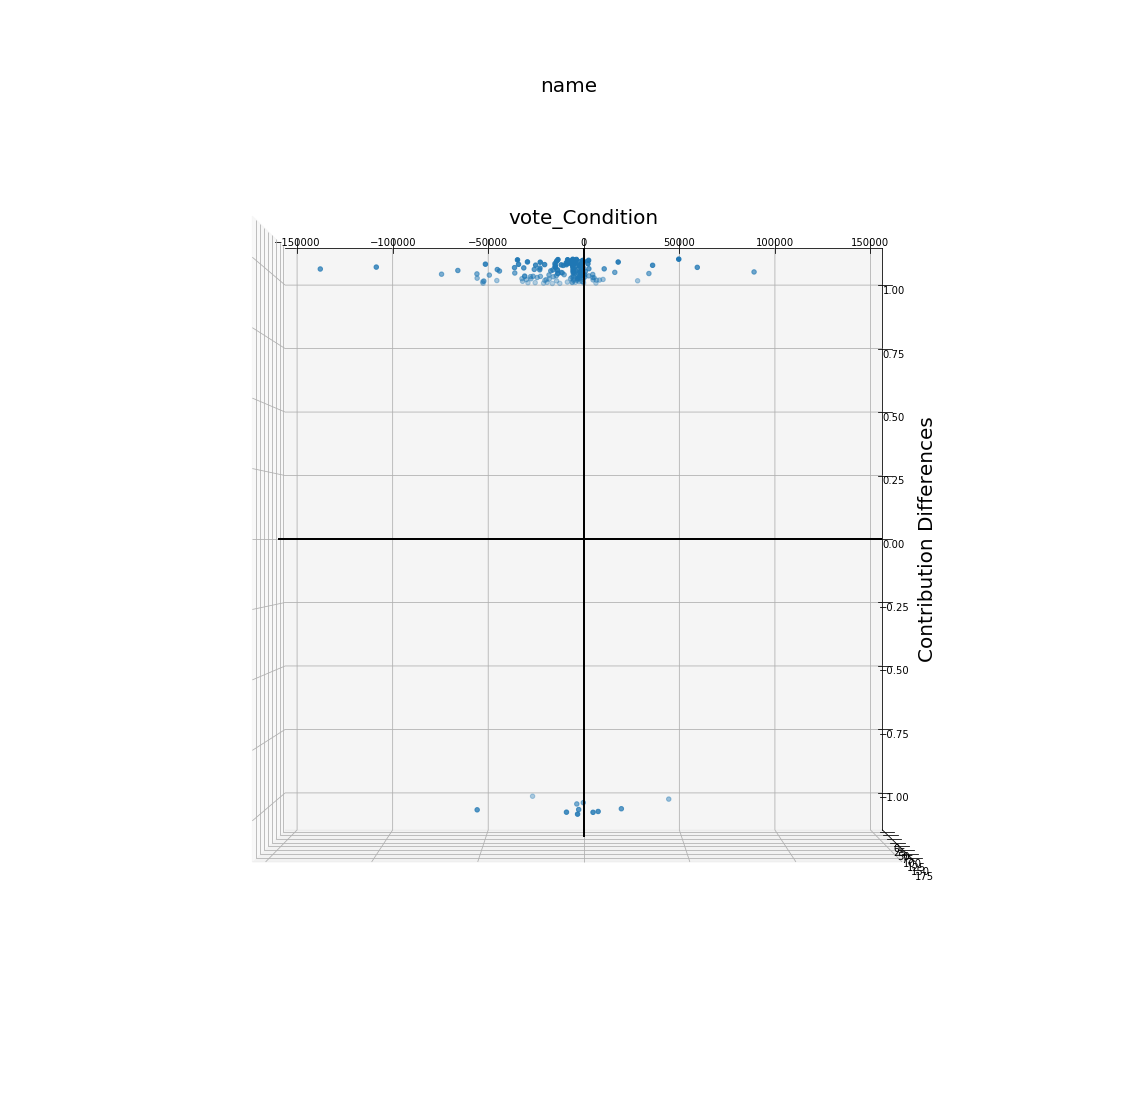

In [66]:



left = [(0,-1,0),(0,1,0),(0,1,high),(0,-1,high)]
right = [(wide1,0,0),(wide1,0,high),(wide2,0,high),(wide2,0,0)]
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
face1 = mp3d.art3d.Poly3DCollection([left], alpha=0.5, linewidth=1)
face2 = mp3d.art3d.Poly3DCollection([right], alpha=0.5, linewidth=1)
alpha = 0.5
face1.set_facecolor((0, 0, 0, alpha))
face2.set_facecolor((0, 0, 0, alpha))

ax.add_collection3d(face1)
ax.add_collection3d(face2)
# Data for a three-dimensional line
zline = billname
xline = difference
yline = Vote_condition
ax.scatter3D(xline, yline, zline, cmap='Greens');
ax.plot_surface(0, 0, zline, rstride=30, cstride=30,
                facecolors=c, shade=False)
ax.view_init(elev=90., azim=-90)

plt.title('name',fontsize=20)
ax.set_xlabel('vote_Condition',fontsize=20)
ax.set_ylabel('Contribution Differences',fontsize=20)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 25
ax.set_xlim([-150000, 150000])
ax.set_ylim([-1.1, 1.1])
plt.axhline(0, color='black',linewidth=2, xmin=0.24, xmax=0.78)
plt.axvline(0, color='black',linewidth=2, ymin=0.24, ymax=0.78)
#fig.savefig(r'C:\Users\tiany\Documents\EE6895 big data\bill\fig\1.png') 
plt.show()

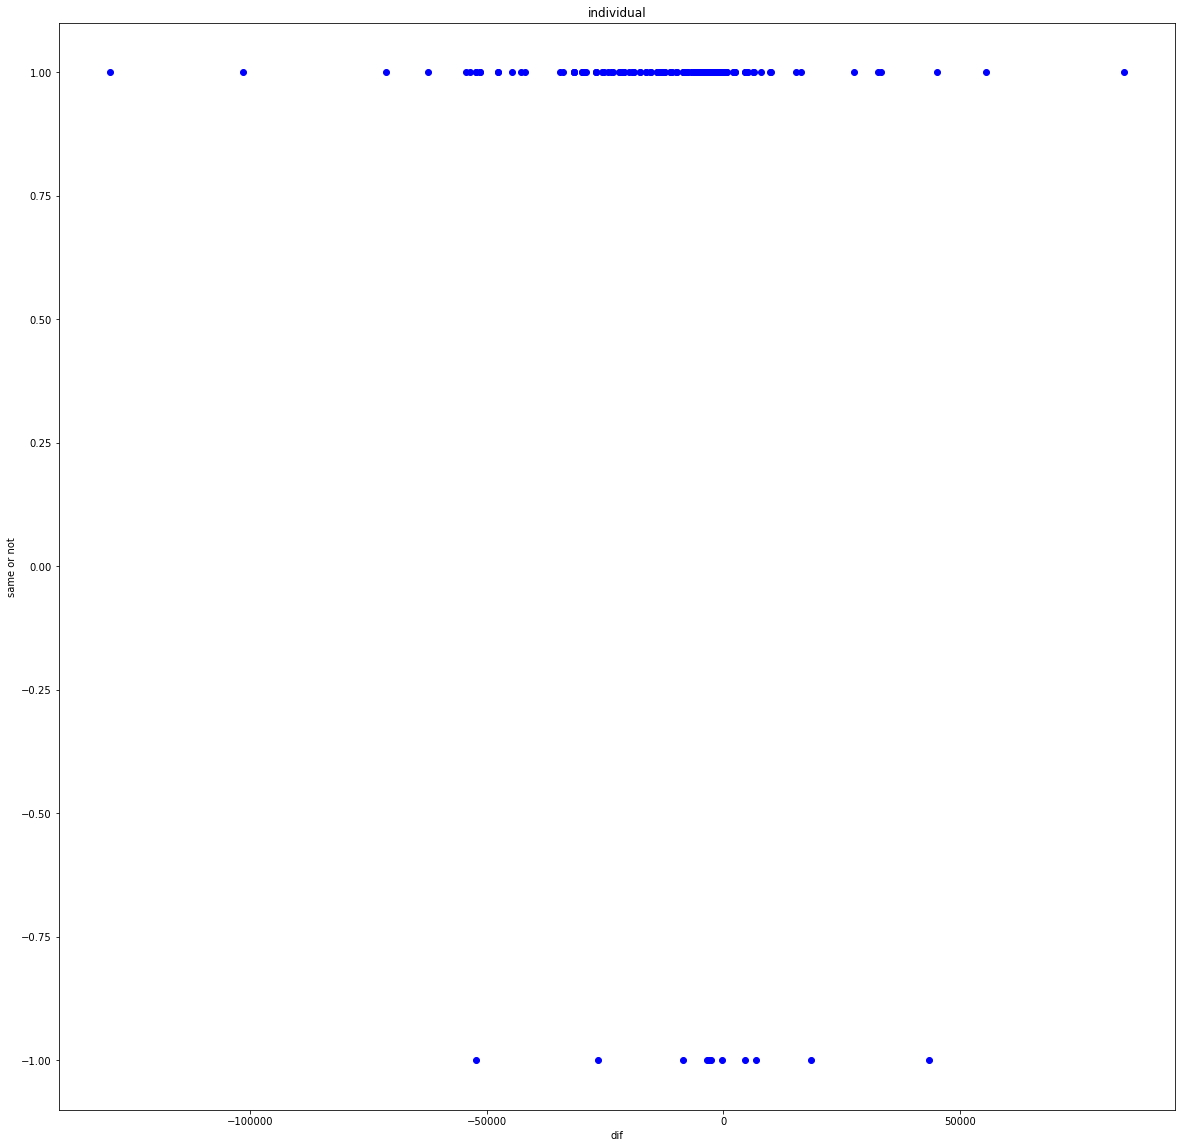

In [145]:
plt.figure(figsize=(20,20))
plt.plot(difference,Vote_condition,'bo')
plt.title('individual')
plt.xlabel('dif')
plt.ylabel('same or not')
plt.show()